In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.holtwinters  as ets

In [28]:
data = pd.read_csv('/Users/lamprosganias/Desktop/Cybersecurity and Data Science/Β Εξάμηνο/Time-Series Analytics and Forecasting (CDS214)/Datasets/Daily-train.csv')
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V9911,V9912,V9913,V9914,V9915,V9916,V9917,V9918,V9919,V9920
0,D1,1017.10,1019.30,1017.00,1019.20,1018.70,1015.60,1018.50,1018.30,1018.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,D2,2793.70,2793.80,2803.70,2805.80,2802.30,2795.00,2806.40,2782.20,2780.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,D3,1091.30,1088.50,1085.70,1082.90,1080.10,1077.30,1074.50,1071.70,1068.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D4,1092.00,1078.00,1064.00,1050.00,1036.00,1022.00,1008.00,1092.00,1078.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,D5,2938.63,2956.44,2964.41,2972.41,3014.97,3014.23,3024.08,3031.97,3062.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4227 entries, 0 to 4226
Columns: 9920 entries, V1 to V9920
dtypes: float64(9919), object(1)
memory usage: 319.9+ MB


In [30]:
data = data.iloc[0]

In [31]:
data = data.dropna()  # drop null values
data = data.to_frame()
data

,0
V1,D1
V2,1017.1
V3,1019.3
V4,1017.0
V5,1019.2
...,...
V1003,2015.6
V1004,2009.7
V1005,2022.1
V1006,2031.6


In [32]:
data.reset_index(inplace=True)

In [33]:
header_row = data.iloc[0]
data = pd.DataFrame(data.values[1:], columns=header_row)
data.head()

,V1,D1
0,V2,1017.1
1,V3,1019.3
2,V4,1017.0
3,V5,1019.2
4,V6,1018.7


<AxesSubplot:>

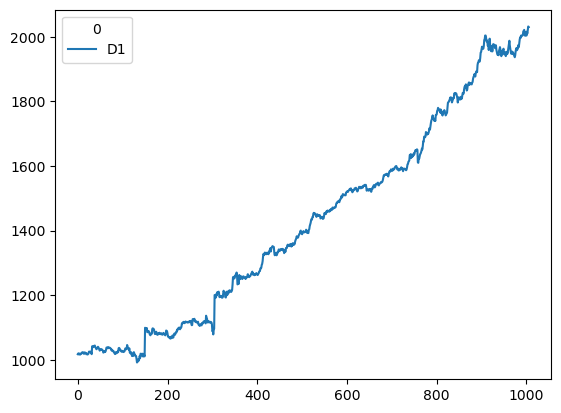

In [34]:
data.plot()

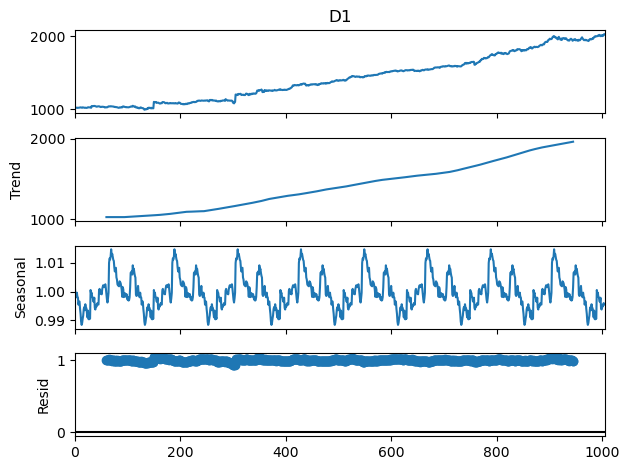

In [35]:
seasonal_decompose(data['D1'], model= 'multiplicative', period=120).plot();

In [36]:
train = data
test = pd.read_csv('/Users/lamprosganias/Desktop/Cybersecurity and Data Science/Β Εξάμηνο/Time-Series Analytics and Forecasting (CDS214)/Datasets/Daily-test.csv')

In [37]:
test = test.iloc[0]

In [38]:
test = test.dropna()  # drop null values
test = test.to_frame()
test

,0
V1,D1
V2,2039.2
V3,2035.0
V4,2051.8
V5,2061.8
V6,2063.5
V7,2069.5
V8,2054.0
V9,2057.0
V10,2062.8


In [39]:
test.reset_index(inplace=True)

In [40]:
header_row = test.iloc[0]
test = pd.DataFrame(test.values[1:], columns=header_row)
test.head()

,V1,D1
0,V2,2039.2
1,V3,2035.0
2,V4,2051.8
3,V5,2061.8
4,V6,2063.5


In [41]:
test.set_index(pd.RangeIndex(start=train.index[-1]+1, stop=train.index[-1]+1+len(test)), inplace=True)
test.head()

,V1,D1
1006,V2,2039.2
1007,V3,2035.0
1008,V4,2051.8
1009,V5,2061.8
1010,V6,2063.5


In [42]:
train['D1'] = train['D1'].astype(float)


In [43]:

ses = ets.ExponentialSmoothing(train.D1, trend = None, damped = False, seasonal= None).fit()


/var/folders/10/ylf9z1m51bq7ks0c7rh20vfw0000gn/T/ipykernel_6203/4268234042.py:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  ses = ets.ExponentialSmoothing(train.D1, trend = None, damped = False, seasonal= None).fit()


In [44]:
forecast = ses.forecast(steps=len(test))

<AxesSubplot:>

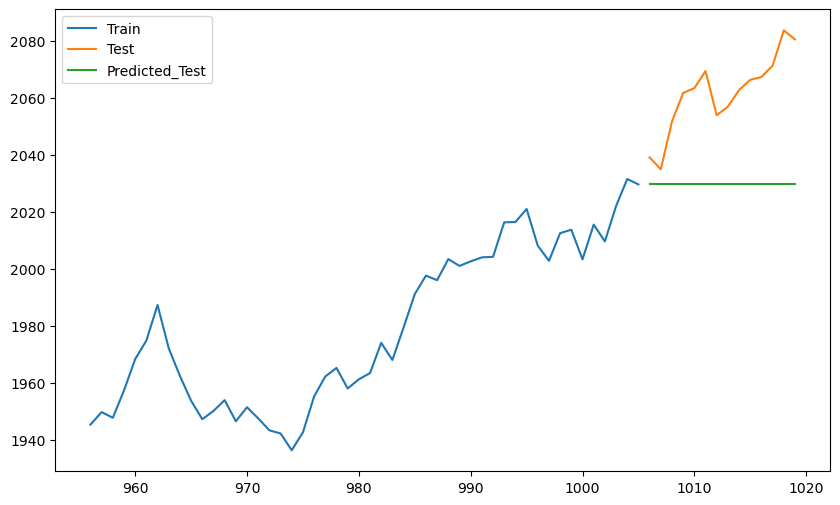

In [47]:
train['D1'].tail(50).plot(legend=True, label='Train',figsize=(10,6))
test['D1'].tail(50).plot(legend=True, label='Test')
forecast.plot(legend=True, label='Predicted_Test')